<a href="https://colab.research.google.com/github/pooja-thalur/511_SimilarityMatching/blob/main/SchoolSimiliarityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('/content/sample_data/ProjectStep2.csv')
df



,School Name,State Name [District] 2022-23,County Name [District] 2022-23,Web Site URL [District] 2022-23,Location Address 1 [District] 2022-23,Location City [District] 2022-23,Location ZIP [District] 2022-23,Phone Number [District] 2022-23,Locale [District] 2022-23,Latitude [District] 2022-23,...,Male Students [District] 2022-23,Female Students [District] 2022-23,American Indian/Alaska Native Students [District] 2022-23,Asian or Asian/Pacific Islander Students [District] 2022-23,Hispanic Students [District] 2022-23,Black or African American Students [District] 2022-23,White Students [District] 2022-23,Nat. Hawaiian or Other Pacific Isl. Students [District] 2022-23,Two or More Races Students [District] 2022-23,AP Program Offered
0,A+ CHARTER SCHOOLS (1000166),ARIZONA,Pinal County,http://aplusaz.org,41600 W Smith-Enke Rd,MARICOPA,85138,5202655589,32-Town: Distant,33.042533,...,155,113,2,2,114,32,106,1,11,NO
1,ACADEMY WITH COMMUNITY PARTNERS INC (79213),ARIZONA,Maricopa County,http://www.acpathope.org,433 N HALL,MESA,85203,4808330068,11-City: Large,33.423526,...,89,82,10,3,93,13,43,0,9,NO
2,ACCELERATED LEARNING CENTER INC. (4297),ARIZONA,Maricopa County,http://acceleratedlearningcenteraz.comDr.,4105 E SHEA BLVD,PHOENIX,85028,6024850309,11-City: Large,33.582212,...,72,81,2,0,27,7,111,0,6,NO
3,ACCLAIM CHARTER SCHOOL (4325),ARIZONA,Maricopa County,http://www.acclaimacademy.org,7624 W INDIAN SCHOOL RD,PHOENIX,85033,6236910919,11-City: Large,33.495776,...,151,117,0,0,226,1,38,2,1,NO
4,AGUA FRIA UNION HIGH SCHOOL DISTRICT (4289),ARIZONA,Maricopa County,http://www.aguafria.org,1481 N ELISEO FELIX JR WAY STE,AVONDALE,85323,6239327000,22-Suburb: Mid-size,33.450600,...,4899,4733,78,313,4923,941,2900,42,435,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,WEST VALLEY ARTS AND TECHNOLOGY ACADEMY INC. (...,ARIZONA,Maricopa County,http://www.Riverbendprep.org,5625 S 51ST AVE,LAVEEN,85339,6022853003,11-City: Large,33.394980,...,130,117,19,3,147,61,6,0,11,NO
350,WEST-MEC - WESTERN MARICOPA EDUCATION CENTER (...,ARIZONA,Maricopa County,http://www.west-mec.org,5487 N 99TH AVE,GLENDALE,85305,6237380022,11-City: Large,33.515170,...,164,128,4,9,0,30,226,3,20,NO
351,WESTERN SCHOOL OF SCIENCE AND TECHNOLOGY INC. ...,ARIZONA,Maricopa County,http://western.cfacademy.school,6515 W INDIAN SCHOOL RD,PHOENIX,85033,6232493900,11-City: Large,33.493699,...,245,277,2,0,509,7,4,0,0,YES
352,WICKENBURG UNIFIED DISTRICT (4236),ARIZONA,Maricopa County,http://www.wickenburgschools.org/,101 COCONINO ST,WICKENBURG,85390,9286685350,41-Rural: Fringe,33.968197,...,651,647,11,4,503,41,698,4,37,NO


In [4]:
#Data PreProcessing

#drop unnecessary columns
cols = ['State Name [District] 2022-23', 'Web Site URL [District] 2022-23','Phone Number [District] 2022-23','Location Address 1 [District] 2022-23']
df = df.drop(cols,axis=1)

#checking for values with na in both rows and columns
df.isna().any(axis=0)
df.isna().any(axis=1)
df.dropna()

#removing unwanted string in the headers
df.columns=df.columns.str.replace('[District] 2022-23','')
df.columns

county_names= df['County Name '].value_counts().index.tolist()

maricopa=[0]* len(df)
pinal=[0]* len(df)
#Transform Country name column by converting it to binary
for i in range (0,len(df)):
  if df.iloc[i]['County Name ']=='Maricopa County':
    maricopa[i]=1
  else:
    pinal[i]=1
#add county names into df
df[county_names[0]] = maricopa
df[county_names[1]] = pinal

#since County Name is redundant and not necessary drop the column
df.drop('County Name ', axis=1, inplace=True)
df.head()

#convert the value of Ap Program offered column from Yes and NO to 0,1s
df['AP Program Offered'].value_counts()
# NO     321
# YES     33
df['AP Program Offered'].replace('YES', 1, inplace=True)
df['AP Program Offered'].replace('NO', 0, inplace=True)

df['Locale '].value_counts()

# https://nces.ed.gov/programs/edge/docs/locale_classifications.pdf
# 11-City: Large         189
# 21-Suburb: Large        65
# 41-Rural: Fringe        25
# 12-City: Mid-size       20
# 22-Suburb: Mid-size     17
# 42-Rural: Distant       14
# 13-City: Small           8
# 32-Town: Distant         6
# 31-Town: Fringe          5
# 43-Rural: Remote         4
# 33-Town: Remote          1

#converting to nces locale classification code
df['Locale '] = df['Locale '].str[:2]
df['Locale '].value_counts()

for i in df['Locale '].value_counts().index.tolist():
  df['Locale '].replace(i, 'Locale_'+i, inplace=True)
  df['Locale_'+i] = [0]*len(df)

#Since it is Nominal,
#Now convert them into different columns
#iterate over each row and assign their corresponding locale
for i in range(0,len(df['Locale '])):
  df[df['Locale '].iloc[i]].iloc[i]=1

#since locale is not necessary drop the locale column
df.drop('Locale ', axis=1, inplace=True)

#now convert the charter status from string to binary attribute
df['LEA Charter Status '].value_counts()
df['LEA Charter Status '] = df['LEA Charter Status '].apply(lambda x: 0 if 'not' in x else 1)

#now convert the numeric columns to int or float as required
c = {'Male Students ': int,'Female Students ': int,'Total Students, All Grades (Excludes AE) ': int,
     'Total Students, All Grades (Includes AE) ': int,'American Indian/Alaska Native Students ': int,
     'Asian or Asian/Pacific Islander Students ': int,'Hispanic Students ': int,
                'Black or African American Students ':int,'White Students ':int,
     'Nat. Hawaiian or Other Pacific Isl. Students ':int
                }
df = df.astype(c)

#remove duplicates
df.duplicated().sum()
df=df.drop_duplicates()
# df.columns

#transform lat long
min_lat = df['Latitude '].min()
for i in range(0,len(df['Latitude '])):
    df['Latitude '].iloc[i]=df['Latitude '].iloc[i]-min_lat
df['Latitude ']

max_lat = df['Longitude '].min()
print(max_lat)
for i in range(0,len(df['Longitude '])):
    df['Longitude '].iloc[i]=df['Longitude '].iloc[i]-(min_lat)
df['Longitude ']


<ipython-input-4-c4292de2a53f>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Locale '].iloc[i]].iloc[i]=1
<ipython-input-4-c4292de2a53f>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Locale '].iloc[i]].iloc[i]=1
<ipython-input-4-c4292de2a53f>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Locale '].iloc[i]].iloc[i]=1
<ipython-input-4-c4292de2a53f>:68: SettingWithCopyWarning: 
A value is trying to be set 

-113.172756


<ipython-input-4-c4292de2a53f>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude '].iloc[i]=df['Latitude '].iloc[i]-min_lat
<ipython-input-4-c4292de2a53f>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude '].iloc[i]=df['Latitude '].iloc[i]-min_lat
<ipython-input-4-c4292de2a53f>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude '].iloc[i]=df['Latitude '].iloc[i]-min_lat
<ipython-input-4-c4292de2a53

0     -144.584795
1     -144.361977
2     -144.561779
3     -144.793285
4     -144.905600
          ...    
349   -144.735971
350   -144.840601
351   -144.769126
352   -145.297628
353   -144.585100
Name: Longitude , Length: 354, dtype: float64

In [5]:
df.head()

,School Name,Location City,Location ZIP,Latitude,Longitude,LEA Charter Status,"Total Students, All Grades (Excludes AE)","Total Students, All Grades (Includes AE)",Male Students,Female Students,...,Locale_21,Locale_41,Locale_12,Locale_22,Locale_42,Locale_13,Locale_32,Locale_31,Locale_43,Locale_33
0,A+ CHARTER SCHOOLS (1000166),MARICOPA,85138,0.473633,-144.584795,1,268,268,155,113,...,0,0,0,0,0,0,1,0,0,0
1,ACADEMY WITH COMMUNITY PARTNERS INC (79213),MESA,85203,0.854626,-144.361977,1,171,171,89,82,...,0,0,0,0,0,0,0,0,0,0
2,ACCELERATED LEARNING CENTER INC. (4297),PHOENIX,85028,1.013312,-144.561779,0,153,153,72,81,...,0,0,0,0,0,0,0,0,0,0
3,ACCLAIM CHARTER SCHOOL (4325),PHOENIX,85033,0.926876,-144.793285,1,268,268,151,117,...,0,0,0,0,0,0,0,0,0,0
4,AGUA FRIA UNION HIGH SCHOOL DISTRICT (4289),AVONDALE,85323,0.881700,-144.905600,0,9632,9632,4899,4733,...,0,0,0,1,0,0,0,0,0,0


In [57]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from yellowbrick.cluster import SilhouetteVisualizer

In [32]:
#Some calculations before trainign
schools_data = df

# Extract features related to popularity
popularity_features = ['Total Students, All Grades (Includes AE) ', 'Total Students, All Grades (Excludes AE) ']

# Subset the DataFrame to include only the popularity features
popularity_data = df[popularity_features]
schools_data['Popularity'] = df['Total Students, All Grades (Includes AE) ']

# Check for missing values and handle them if necessary
popularity_data.isnull().sum()

# Calculate gender ratio (male to female ratio)
schools_data['Gender Ratio'] = schools_data['Male Students '] / schools_data['Female Students ']

# Calculate diversity index (assuming racial diversity)
racial_categories = ['White Students ', 'Black or African American Students ', 'Hispanic Students ', 'Asian or Asian/Pacific Islander Students ',
                     'American Indian/Alaska Native Students ', 'Nat. Hawaiian or Other Pacific Isl. Students ',
       'Two or More Races Students ']
for category in racial_categories:
    schools_data[category + '_Proportion'] = schools_data[category] / schools_data['Total Students, All Grades (Includes AE) ']

schools_data['Diversity Index'] = 1 - schools_data[[category + '_Proportion' for category in racial_categories]].pow(2).sum(axis=1)

# Extract features related to gender ratio and inclusivity
# gender_inclusivity_features = ['Gender Ratio', 'Diversity Index','Latitude ','Longitude ',]
# gender_inclusivity_data = schools_data[gender_inclusivity_features]
numerical_data = ['Popularity','Diversity Index', 'Gender Ratio', 'Total Students, All Grades (Includes AE) ',
                  'Male Students ',
       'Female Students ', 'American Indian/Alaska Native Students ',
       'Asian or Asian/Pacific Islander Students ', 'Hispanic Students ',
       'Black or African American Students ', 'White Students ',
       'Nat. Hawaiian or Other Pacific Isl. Students ',
       'Two or More Races Students ', 'AP Program Offered', 'Maricopa County',
       'Pinal County', 'Locale_11', 'Locale_21', 'Locale_41', 'Locale_12',
       'Locale_22', 'Locale_42', 'Locale_13', 'Locale_32', 'Locale_31',
       'Locale_43', 'Locale_33']
# print(gender_inclusivity_data.head())
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
features_for_clustering_imputed = imp.fit_transform(schools_data[numerical_data])

scaler = StandardScaler()
features_for_clustering_imputed = scaler.fit_transform(features_for_clustering_imputed)
# schools_data[numerical_data] = scaler.fit_transform(schools_data[numerical_data])

features = features_for_clustering_imputed #schools_data[['Popularity', 'Gender Ratio', 'Diversity Index', 'AP Program Offered']]

similarity_matrix = cosine_similarity(features)
similarity_matrix
features_for_clustering_imputed

array([[-0.32508262,  0.07917135, -0.27584121, ..., -0.11969397,
        -0.1069045 , -0.05322463],
       [-0.34102747,  0.07927509, -0.05505683, ..., -0.11969397,
        -0.1069045 , -0.05322463],
       [-0.34398631,  0.07894165,  0.04542318, ..., -0.11969397,
        -0.1069045 , -0.05322463],
       ...,
       [-0.28333012,  0.0770375 ,  0.29829856, ..., -0.11969397,
        -0.1069045 , -0.05322463],
       [-0.15577132,  0.07165981,  0.24806665, ..., -0.11969397,
        -0.1069045 , -0.05322463],
       [-0.19209928,  0.07606445,  0.35014661, ..., -0.11969397,
        -0.1069045 , -0.05322463]])

In [29]:
schools_data

,School Name,Location City,Location ZIP,Latitude,Longitude,LEA Charter Status,"Total Students, All Grades (Excludes AE)","Total Students, All Grades (Includes AE)",Male Students,Female Students,...,Popularity,Gender Ratio,White Students _Proportion,Black or African American Students _Proportion,Hispanic Students _Proportion,Asian or Asian/Pacific Islander Students _Proportion,American Indian/Alaska Native Students _Proportion,Nat. Hawaiian or Other Pacific Isl. Students _Proportion,Two or More Races Students _Proportion,Diversity Index
0,A+ CHARTER SCHOOLS (1000166),MARICOPA,85138,0.473633,-144.584795,1,268,-0.325083,-0.316536,-0.334018,...,-0.325083,0.947662,0.781431,1.003490,1.022186,0.845489,0.855401,0.758294,0.941469,-4.570427
1,ACADEMY WITH COMMUNITY PARTNERS INC (79213),MESA,85203,0.854626,-144.361977,1,171,-0.341027,-0.337681,-0.344481,...,-0.341027,0.980261,0.811328,1.104226,0.996713,0.796460,0.676195,0.811874,0.917065,-4.462742
2,ACCELERATED LEARNING CENTER INC. (4297),PHOENIX,85028,1.013312,-144.561779,0,153,-0.343986,-0.343128,-0.344819,...,-0.343986,0.995096,0.733260,1.140955,1.057682,0.817858,0.808392,0.804891,0.938347,-4.808873
3,ACCLAIM CHARTER SCHOOL (4325),PHOENIX,85033,0.926876,-144.793285,1,268,-0.325083,-0.317818,-0.332668,...,-0.325083,0.955361,0.856653,1.256216,0.897312,0.865417,0.891911,0.664892,1.044355,-5.194314
4,AGUA FRIA UNION HIGH SCHOOL DISTRICT (4289),AVONDALE,85323,0.881700,-144.905600,0,9632,1.214171,1.203338,1.225329,...,1.214171,0.982053,0.618304,1.715440,1.161885,0.603288,0.142430,0.822276,0.915917,-5.574297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,WEST VALLEY ARTS AND TECHNOLOGY ACADEMY INC. (...,LAVEEN,85339,0.826080,-144.735971,1,247,-0.328535,-0.324546,-0.332668,...,-0.328535,0.975585,0.882679,0.759009,0.975039,0.826746,0.539341,0.842747,0.931577,-3.858374
350,WEST-MEC - WESTERN MARICOPA EDUCATION CENTER (...,GLENDALE,85305,0.946270,-144.840601,0,292,-0.321138,-0.313653,-0.328955,...,-0.321138,0.953482,0.656653,1.032323,1.163409,0.785272,0.828951,0.578512,0.859299,-4.227288
351,WESTERN SCHOOL OF SCIENCE AND TECHNOLOGY INC. ...,PHOENIX,85033,0.924799,-144.769126,1,522,-0.283330,-0.287702,-0.278665,...,-0.283330,1.032432,1.026047,1.385214,0.667516,0.992947,0.981456,0.977204,1.210060,-6.785539
352,WICKENBURG UNIFIED DISTRICT (4236),WICKENBURG,85390,1.399297,-145.297628,0,1298,-0.155771,-0.157629,-0.153782,...,-0.155771,1.025016,0.264099,1.941084,1.228095,1.722882,1.442286,0.997735,1.406511,-12.368033


In [50]:
def progressiveFeatureSelection(df, feature_list, n_clusters=3, max_features=4,):
    '''
    very basic implementation of an algorithm for feature selection (unsupervised clustering);
    inspired by this post: https://datascience.stackexchange.com/questions/67040/how-to-do-feature-selection-for-clustering-and-implement-it-in-python
    '''
    # feature_list = list(df.columns)
    selected_features = list()
    # select starting feature
    initial_feature = ""
    high_score = 0
    for feature in feature_list:
      print(feature)
      kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
      data_ = df[feature]
      labels = kmeans.fit_predict(data_.to_frame())
      score_ = silhouette_score(data_.to_frame(), labels)
      print("Proposed new feature {} with score {}". format(feature, score_))
      if score_ >= high_score:
          initial_feature = feature
          high_score = score_
    print("The initial feature is {} with a silhouette score of {}.".format(initial_feature, high_score))
    feature_list.remove(initial_feature)
    selected_features.append(initial_feature)
    for _ in range(max_features-1):
        high_score = 0
        selected_feature = ""
        print("Starting selection {}...".format(_))
        for feature in feature_list:
            selection_ = selected_features.copy()
            selection_.append(feature)
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            data_ = df[selection_]
            labels = kmeans.fit_predict(data_)
            score_ = silhouette_score(data_, labels)
            print("Proposed new feature {} with score {}". format(feature, score_))
            if score_ > high_score:
                selected_feature = feature
                high_score = score_
        selected_features.append(selected_feature)
        feature_list.remove(selected_feature)
        print("Selected new feature {} with score {}". format(selected_feature, high_score))
    return selected_features

progressiveFeatureSelection(schools_data, numerical_data,6)

Popularity
Proposed new feature Popularity with score 0.8316384609721414
Total Students, All Grades (Includes AE) 
Proposed new feature Total Students, All Grades (Includes AE)  with score 0.8316384609721414
Male Students 
Proposed new feature Male Students  with score 0.8319523458752347
Female Students 
Proposed new feature Female Students  with score 0.8266292577363991
American Indian/Alaska Native Students 
Proposed new feature American Indian/Alaska Native Students  with score 0.8353105843940151
Asian or Asian/Pacific Islander Students 
Proposed new feature Asian or Asian/Pacific Islander Students  with score 0.7674077295588163
Hispanic Students 
Proposed new feature Hispanic Students  with score 0.8293268985538589
Black or African American Students 
Proposed new feature Black or African American Students  with score 0.7560021311663719
White Students 
Proposed new feature White Students  with score 0.8226512592496428
Nat. Hawaiian or Other Pacific Isl. Students 
Proposed new featur

['American Indian/Alaska Native Students ',
 'Hispanic Students ',
 'Female Students ',
 'Male Students ']

<ipython-input-51-027c00a2e4af>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=schools_data['Gender Ratio'] , y=schools_data['Popularity'], data=schools_data, palette='viridis')


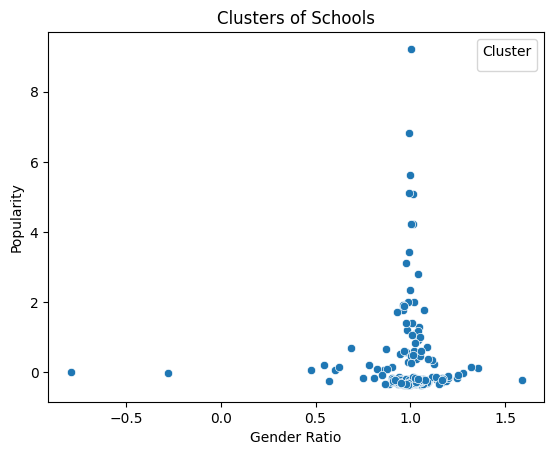

<ipython-input-51-027c00a2e4af>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=schools_data['Diversity Index'] , y=schools_data['Popularity'], data=schools_data, palette='viridis')


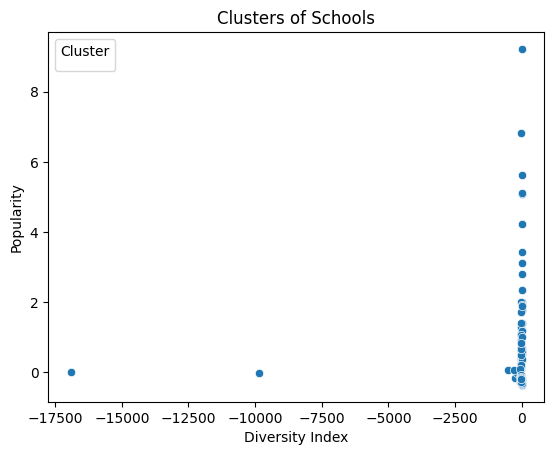

<ipython-input-51-027c00a2e4af>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=schools_data['Female Students '] , y=schools_data['Asian or Asian/Pacific Islander Students '], data=schools_data, palette='viridis')


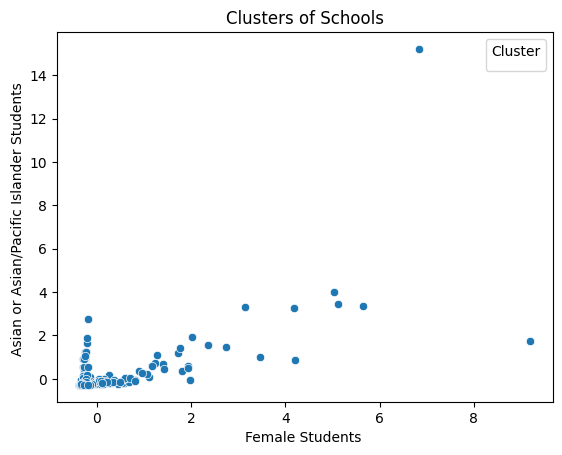

In [51]:
sns.scatterplot(x=schools_data['Gender Ratio'] , y=schools_data['Popularity'], data=schools_data, palette='viridis')
plt.title('Clusters of Schools')
plt.legend(title='Cluster')
plt.show()

sns.scatterplot(x=schools_data['Diversity Index'] , y=schools_data['Popularity'], data=schools_data, palette='viridis')
plt.title('Clusters of Schools')
plt.legend(title='Cluster')
plt.show()

sns.scatterplot(x=schools_data['Female Students '] , y=schools_data['Asian or Asian/Pacific Islander Students '], data=schools_data, palette='viridis')
plt.title('Clusters of Schools')
plt.legend(title='Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

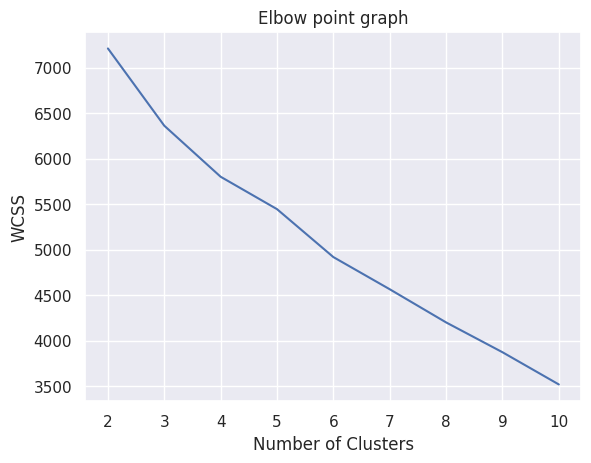

In [55]:
#Experimenting

#WCSS - Winthin clusters sum of squares
#elbow method
wcss = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i,init='k-means++', random_state=42)
  kmeans.fit(features_for_clustering_imputed)
  wcss.append(kmeans.inertia_)

#plot wcss graph
sns.set()
plt.plot(range(2,11), wcss)
plt.title("Elbow point graph")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

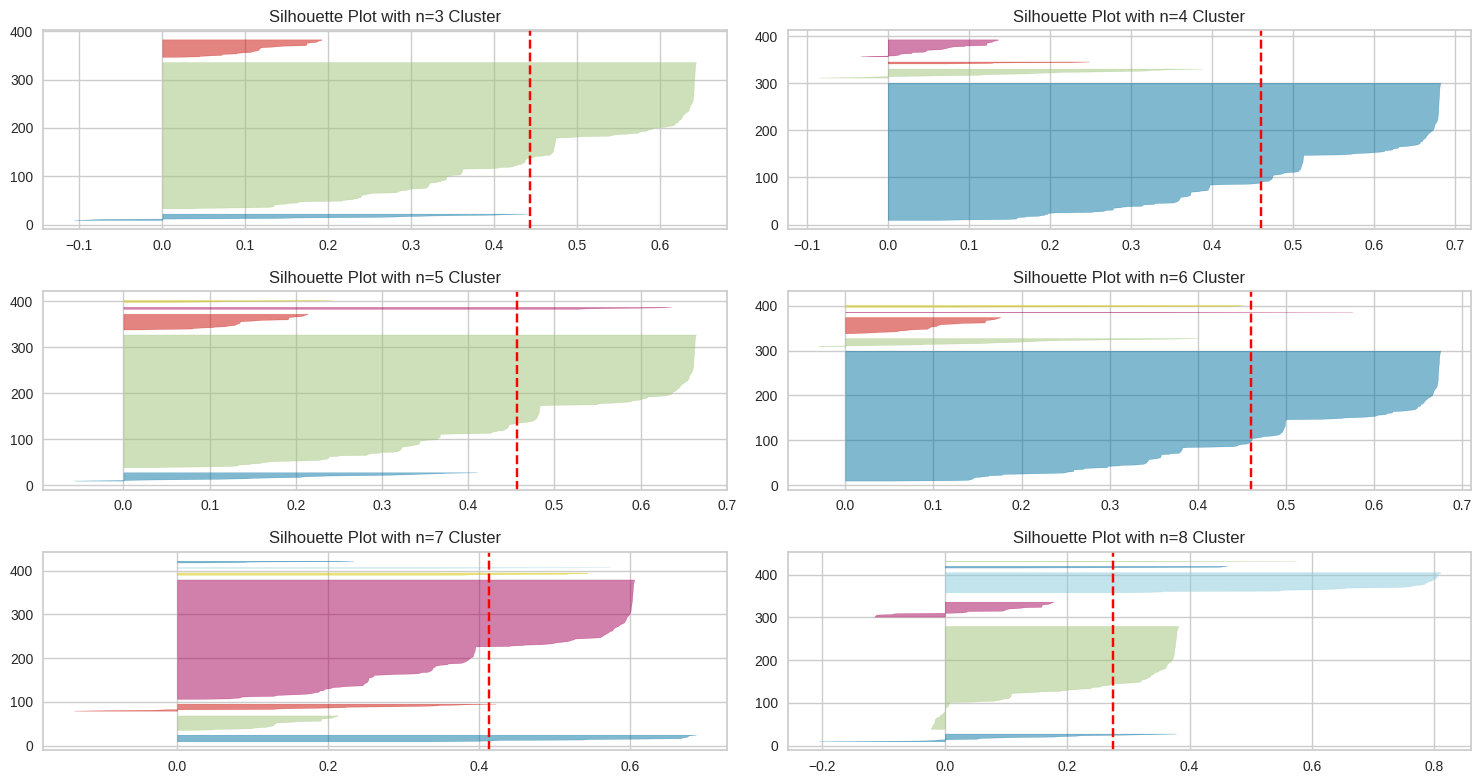

In [60]:
def silhouettePlot(range_, data):
    '''
    we will use this function to plot a silhouette plot that helps us to evaluate the cohesion in clusters (k-means only)
    '''
    half_length = int(len(range_)/2)
    range_list = list(range_)
    fig, ax = plt.subplots(half_length, 2, figsize=(15,8))
    for _ in range_:
        kmeans = KMeans(n_clusters=_, random_state=42)
        q, mod = divmod(_ - range_list[0], 2)
        sv = SilhouetteVisualizer(kmeans, colors="yellowbrick", ax=ax[q][mod])
        ax[q][mod].set_title("Silhouette Plot with n={} Cluster".format(_))
        sv.fit(data)
    fig.tight_layout()
    fig.show()

silhouettePlot(range(3,9), features_for_clustering_imputed)

In [49]:
# Initialize K-means with the number of clusters
num_clusters = 6  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit K-means to the similarity matrix
kmeans.fit(similarity_matrix)

# Get the cluster labels for each school
cluster_labels = kmeans.labels_

# Print the cluster labels for the first few schools
print("Cluster labels for the first few schools:", cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels for the first few schools: [1 0 0 0 5 4 0 1 5 0 0 0 3 4 3 0 0 0 0 3 5 5 0 1 3 0 4 3 4 0 4 0 4 0 3 0 0
 0 4 2 0 4 0 3 0 2 4 0 0 0 0 0 0 0 0 0 1 4 5 0 0 0 0 3 4 3 0 0 4 4 3 3 2 4
 2 2 4 3 0 4 4 4 0 0 0 0 0 3 0 0 4 4 3 0 3 0 3 2 5 0 1 1 4 1 3 3 0 5 0 4 0
 1 0 0 3 0 2 2 0 3 3 5 3 5 0 0 0 0 0 0 0 3 4 2 0 0 0 2 4 0 0 3 1 1 2 2 2 2
 0 3 1 2 5 3 2 0 3 4 0 0 0 4 5 5 3 5 1 3 4 4 2 4 3 5 4 2 2 4 4 4 0 0 0 1 0
 0 3 1 1 3 1 4 0 0 2 1 4 3 0 4 3 3 3 4 0 0 4 4 0 0 0 0 0 0 0 4 0 0 5 5 3 4
 1 0 4 1 0 0 0 3 3 4 1 0 0 3 0 1 4 0 1 4 4 5 4 5 5 2 1 0 5 1 0 0 5 0 0 0 4
 3 0 0 0 4 0 4 4 0 0 3 0 0 1 2 0 4 4 5 3 0 0 0 5 0 5 2 0 5 1 1 4 4 0 0 5 0
 5 1 1 0 0 0 0 5 4 3 1 4 0 4 3 1 0 0 0 4 5 0 4 0 0 0 0 1 0 3 3 1 4 5 5 0 0
 1 1 0 3 5 1 4 0 0 0 0 0 0 5 4 0 0 0 2 4 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='pc_1', ylabel='pc_2'>

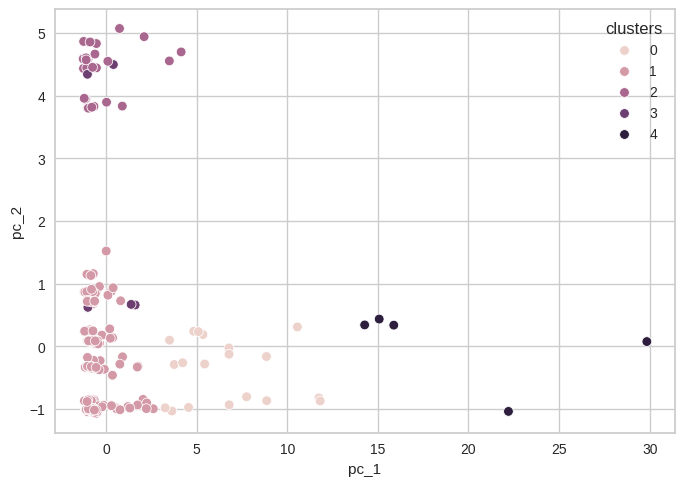

In [62]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(features_for_clustering_imputed)
schools_data["clusters"] = cluster_labels

# using PCA to reduce the dimensionality
pca = PCA(n_components=2, whiten=False, random_state=42)
standardized_pca = pca.fit_transform(features_for_clustering_imputed)
df_schools_standardized_pca = pd.DataFrame(data=standardized_pca, columns=["pc_1", "pc_2"])
df_schools_standardized_pca["clusters"] = cluster_labels

# plotting the clusters with seaborn
sns.scatterplot(x="pc_1", y="pc_2", hue="clusters", data=df_schools_standardized_pca)

In [66]:
def get_similarSchools(sch_name):
  school_cluster = schools_data[schools_data['School Name']==sch_name]['clusters'].iloc[0]
  print(f"Belongs to Cluster - {school_cluster}")
  findSchoolsInSameCluster(school_cluster)

def findSchoolsInSameCluster(cluster):
  print(schools_data.groupby('clusters').get_group(cluster)['School Name'])

#Give the school name to find the schools similar to it
school = 'AGUA FRIA UNION HIGH SCHOOL DISTRICT (4289)'
get_similarSchools(school)

Belongs to Cluster - 0
4       AGUA FRIA UNION HIGH SCHOOL DISTRICT (4289)
8               ALHAMBRA ELEMENTARY DISTRICT (4280)
20          AMERICAN LEADERSHIP ACADEMY INC. (4348)
98            CARTWRIGHT ELEMENTARY DISTRICT (4282)
123                  DYSART UNIFIED DISTRICT (4243)
163             GLENDALE ELEMENTARY DISTRICT (4271)
165      GLENDALE UNION HIGH SCHOOL DISTRICT (4285)
173           HIGLEY UNIFIED SCHOOL DISTRICT (4248)
218               KYRENE ELEMENTARY DISTRICT (4267)
219               LAVEEN ELEMENTARY DISTRICT (4276)
243           LITCHFIELD ELEMENTARY DISTRICT (4281)
277         PARADISE VALLEY UNIFIED DISTRICT (4241)
287       PHOENIX UNION HIGH SCHOOL DISTRICT (4286)
296             QUEEN CREEK UNIFIED DISTRICT (4245)
316              SCOTTSDALE UNIFIED DISTRICT (4240)
329                    TEMPE SCHOOL DISTRICT (4258)
330         TEMPE UNION HIGH SCHOOL DISTRICT (4287)
337      TOLLESON UNION HIGH SCHOOL DISTRICT (4288)
346    WASHINGTON ELEMENTARY SCHOOL DISTR